# **차량 공유업체의 차량 파손 여부 분류하기**

## 0.미션

* 1) 미션1 : Data Preprocessing
    - **과제 수행 목표**
        - 모델링 수행을 위해 적절한 폴더 및 파일로 **일관성 있게 정리**해야 합니다.
        - 제공된 데이터 : Car_Images.zip
            * Car_Images : 차량의 정상/파손 이미지 무작위 수집

* 2) 미션2 : CNN 모델링
    - **과제 수행 목표**
        - Tensorflow Keras를 이용하여 모델을 3개 이상 생성하세요.
            - 모델 구조와 파라미터는 자유롭게 구성하세요.
            - 단, 세부 목차에서 명시한 부분은 지켜주세요.

* 3) 미션3 : Data Augmentation & Transfer Learning
    - **과제 수행 목표**
        - 성능 개선을 위해 다음의 두가지를 시도하세요.
            * Data Augmentation을 적용하세요.(Image Generator)
            * Transfer Learning(VGG16)
* 성능 가이드
    * Accuracy : 0.34~0.74

## 1.환경설정

* **세부 요구사항**
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 구글 드라이브 바로 밑에 project 폴더를 만들고,
        * 데이터 파일을 복사해 넣습니다.
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### (2) 라이브러리 불러오기

In [ ]:
import zipfile, os, random, shutil, glob, yaml, json
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

### (3) 데이터 불러오기

#### 1) 데이터 압축 해제

In [ ]:
path = '/content/drive/MyDrive/2023.11.01_미니프로젝트6차_실습자료 및 데이터/'

In [ ]:
file1 = 'Car_Images.zip'
path + file1

'/content/drive/MyDrive/2023.11.01_미니프로젝트6차_실습자료 및 데이터/Car_Images.zip'

In [ ]:
# 압축 해제

data = zipfile.ZipFile(path+file1)

try :
    print('압축을 해제합니다.')
    data.extractall('/content/Dataset/')
    print('압축 해제가 완료되었습니다.')
except :
    pass
    print('압축이 이미 해제되었거나 이미 폴더가 존재합니다.')

압축을 해제합니다.
압축 해제가 완료되었습니다.


#### 2) 데이터 조회

In [ ]:
# 폴더별 이미지 데이터 갯수 확인

print(f"정상 차량 이미지 데이터는 {len(glob.glob(path+'normal/*'))}장 입니다.")
print(f"파손 차량 이미지 데이터는 {len(glob.glob(path+'abnormal/*'))}장 입니다.")

정상 차량 이미지 데이터는 302장 입니다.
파손 차량 이미지 데이터는 303장 입니다.


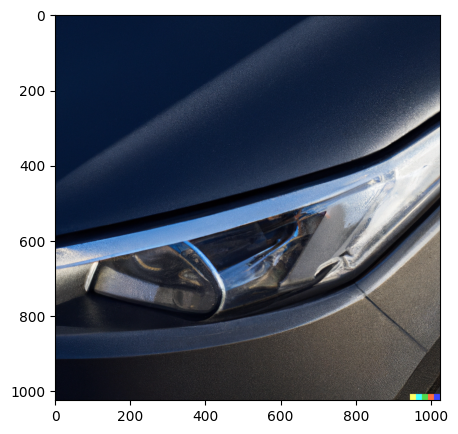

이미지 데이터의 형태는 다음과 같습니다 : (1024, 1024, 3)


In [ ]:
# 정상 차량 랜덤 이미지 확인 및 형태 확인

rand_n = random.randint( 0, len(glob.glob(path+'normal/*'))-1 )

plt.figure(figsize=(5,5))
img = plt.imread(glob.glob(path+'normal/*')[rand_n])
plt.imshow(img)
plt.show()

print(f'이미지 데이터의 형태는 다음과 같습니다 : {img.shape}')

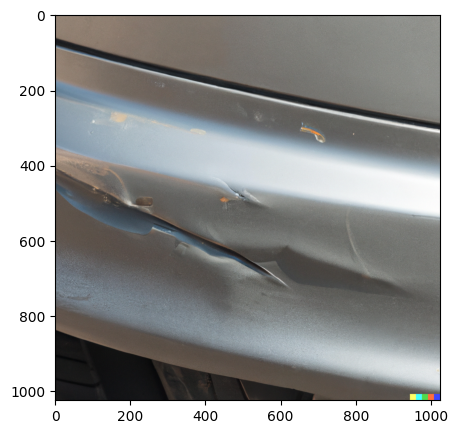

이미지 데이터의 형태는 다음과 같습니다 : (1024, 1024, 3)


In [ ]:
# 파손 차량 랜덤 이미지 확인 및 형태 확인

rand_n = random.randint( 0, len(glob.glob(path+'abnormal/*'))-1 )

plt.figure(figsize=(5,5))
img = plt.imread(glob.glob(path+'abnormal/*')[rand_n])
plt.imshow(img)
plt.show()

print(f'이미지 데이터의 형태는 다음과 같습니다 : {img.shape}')

## 2.데이터 전처리

### (1) 모델링 I용 전처리
* 모델링을 위한 데이터 구조 만들기
    * X : 이미지를 array로 변환합니다.
    * Y : 이미지 갯수만큼 normal - 0, abnormal - 1 로 array를 만듭니다.

#### 1) Y : 클래스 만들기
- **세부요구사항**
    - 전체 데이터에 대한 Y를 생성합니다.
    - normal, abnormal 데이터의 수를 확인하고 normal을 0, abnormal을 1로 지정합니다.

In [ ]:
print('normal 데이터 수 : ', len(glob.glob(path+'normal/*')))
print('abnormal 데이터 수 : ', len(glob.glob(path+'abnormal/*')))

normal 데이터 수 :  302
abnormal 데이터 수 :  303


In [ ]:
label_0 = [0] * 302
label_1 = [1] * 303
label = label_0 + label_1
print(label)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

#### 2) X : 데이터 리스트 통합
- **세부요구사항**
    - 전체 이미지 데이터를 하나의 리스트로 통합합니다.

In [ ]:
images = glob.glob(path+'normal/*') + glob.glob(path+'abnormal/*')

#### 3) 데이터셋 분리
- **세부요구사항**
    - 데이터 스플릿의 비율은 train set : validation set : test set = 8 : 1: 1 로 설정하세요.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(images, label, test_size=0.2, random_state=2023)
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.5, random_state=2023)

#### 4) X : image to array
- **세부요구사항**
    * 모델링을 위해서는 np.array 형태로 데이터셋을 만들어야 합니다.
    * Training set / Validation set / Test set의 X는 이미지 형태로 되어있습니다.
    * 이미지 파일을 불러와 Training data, Validation data, Test data 각각 array 형태로 변환해 봅시다.
        * 각 폴더로 부터 이미지 목록을 만들고
        * 이미지 한장씩 적절한 크기로 로딩하여 (keras.utils.load_img)
            * 이미지가 너무 크면 학습시간이 많이 걸리고, 메모리 부족현상이 발생될 수 있습니다.
            * 이미지 크기를 280 * 280 * 3 이내의 크기를 설정하여 로딩하시오.
            * array로 변환 (keras.utils.img_to_array, np.expand_dims)
        * 데이터셋에 추가합니다.(데이터셋도 array)

In [ ]:
x_train_array = []
x_val_array = []
x_test_array = []

for i in range(len(x_train)):
    temp = keras.utils.load_img(x_train[i])
    temp = keras.utils.img_to_array(temp.resize((280, 280)))
    x_train_array.append(temp)

for i in range(len(x_val)):
    temp = keras.utils.load_img(x_val[i])
    temp = keras.utils.img_to_array(temp.resize((280, 280)))
    x_val_array.append(temp)

for i in range(len(x_test)):
    temp = keras.utils.load_img(x_test[i])
    temp = keras.utils.img_to_array(temp.resize((280, 280)))
    x_test_array.append(temp)

### (2) 모델링 II용 전처리

#### 1) 데이터셋 분리를 위한 폴더 생성
- **세부요구사항**
    - train, validation, test 데이터셋을 만들기 위해 각각 폴더를 생성하고, 하위 폴더 normal과 abnormal을 생성합니다.
        * 정상 이미지 저장소
            - project/Car_Images_train/normal/
            - project/Car_Images_val/normal/
            - project/Car_Images_test/normal/
        * 파손 이미지 저장소
            - project/Car_Images_train/abnormal/
            - project/Car_Images_val/abnormal/
            - project/Car_Images_test/abnormal/
---
- 직접 탐색기에서 폴더를 생성할 수도 있고, os 모듈을 이용하여 코드로 작성할 수도 있습니다.
    - 참고 자료 : [os document](https://docs.python.org/3/library/os.html)

In [ ]:
!mkdir /content/project;

!mkdir /content/project/Car_Images_train;
!mkdir /content/project/Car_Images_val;
!mkdir /content/project/Car_Images_test;

!mkdir /content/project/Car_Images_train/normal;
!mkdir /content/project/Car_Images_val/normal;
!mkdir /content/project/Car_Images_test/normal;

!mkdir /content/project/Car_Images_train/abnormal;
!mkdir /content/project/Car_Images_val/abnormal;
!mkdir /content/project/Car_Images_test/abnormal;

#### 2) 각 폴더에 이미지 데이터 복사
- **세부요구사항**
    - 이전 단계에서 생성한 폴더 normal, abnormal 각각에 이미지 파일을 복사합니다.
    - 데이터 스플릿의 비율은 train set : validation set : test set = 8 : 1 : 1 로 설정하세요.

In [ ]:
import shutil

folder_train_n = '/content/project/Car_Images_train/normal'
folder_val_n = '/content/project/Car_Images_val/normal'
folder_test_n = '/content/project/Car_Images_test/normal'

folder_train_a = '/content/project/Car_Images_train/abnormal'
folder_val_a = '/content/project/Car_Images_val/abnormal'
folder_test_a = '/content/project/Car_Images_test/abnormal'

In [ ]:
import re
string = 'aeabds'
if re.search('aes', string):
    print('사랑해')

In [ ]:
import re

for file in x_train:
    if re.search('abnormal', file):
        destination_path = os.path.join(folder_train_a, file.split('/')[-1])
        shutil.copyfile(file, destination_path)
    else:
        shutil.copyfile(file, os.path.join(folder_train_n, file.split('/')[-1]))

for file in x_val:
    if re.search('abnormal', file):
        destination_path = os.path.join(folder_val_a, file.split('/')[-1])
        shutil.copyfile(file, destination_path)
    else:
        shutil.copyfile(file, os.path.join(folder_val_n, file.split('/')[-1]))

for file in x_test:
    if re.search('abnormal', file):
        destination_path = os.path.join(folder_test_a, file.split('/')[-1])
        shutil.copyfile(file, destination_path)
    else:
        shutil.copyfile(file, os.path.join(folder_test_n, file.split('/')[-1]))

#### 3) Y : 클래스 만들기
- **세부요구사항**
    - Test용 데이터에 대한 Y를 생성합니다.
    - normal, abnormal 데이터의 수를 확인하고 normal을 0, abnormal을 1로 지정합니다.

In [ ]:
import pandas as pd
pd.Series(y_test).value_counts()

0    34
1    27
dtype: int64

In [ ]:
label_0 = [0] * 34
label_1 = [1] * 27
label_test = label_0 + label_1
print(label_test)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


#### 4) X : image to array
- **세부요구사항**
    * 모델링 II에서는 ImageDataGenerator를 이용하기 때문에 Test data에 대해서만 np.array 형태로 데이터셋을 만들어야 합니다.
    * 이미지 파일을 불러와 Test data 각각 array 형태로 변환해 봅시다.
        * 각 폴더로 부터 이미지 목록을 만들고
        * 이미지 한장씩 적절한 크기로 로딩하여 (keras.utils.load_img)
            * 이미지가 너무 크면 학습시간이 많이 걸리고, 메모리 부족현상이 발생될 수 있습니다.
            * 이미지 크기를 280 * 280 * 3 이내의 크기를 설정하여 로딩하시오.
            * array로 변환 (keras.utils.img_to_array, np.expand_dims)
        * 데이터셋에 추가합니다.(데이터셋도 array)

In [ ]:
test_images = glob.glob('/content/project/Car_Images_test/normal/*') + glob.glob('/content/project/Car_Images_test/abnormal/*')

In [ ]:
x_2_test_array = []

for i in range(len(test_images)):
    temp = keras.utils.load_img(x_test[i])
    temp = keras.utils.img_to_array(temp.resize((280, 280)))
    x_2_test_array.append(temp)

In [ ]:
x_2_test_array

[array([[[ 73.,  73.,  69.],
         [ 73.,  72.,  70.],
         [ 71.,  71.,  69.],
         ...,
         [ 34.,  37.,  36.],
         [ 35.,  37.,  37.],
         [ 35.,  35.,  36.]],
 
        [[ 71.,  71.,  69.],
         [ 72.,  72.,  69.],
         [ 71.,  71.,  67.],
         ...,
         [ 36.,  37.,  37.],
         [ 35.,  36.,  38.],
         [ 36.,  36.,  38.]],
 
        [[ 72.,  72.,  68.],
         [ 71.,  71.,  67.],
         [ 72.,  71.,  67.],
         ...,
         [ 36.,  36.,  37.],
         [ 35.,  37.,  36.],
         [ 36.,  37.,  37.]],
 
        ...,
 
        [[ 82.,  82.,  81.],
         [ 83.,  82.,  81.],
         [ 83.,  82.,  81.],
         ...,
         [ 60.,  70., 255.],
         [ 60.,  70., 255.],
         [ 60.,  70., 255.]],
 
        [[ 81.,  82.,  81.],
         [ 82.,  81.,  81.],
         [ 82.,  81.,  80.],
         ...,
         [ 60.,  70., 255.],
         [ 60.,  70., 255.],
         [ 60.,  70., 255.]],
 
        [[ 82.,  81.,  80.],
 

## 3.모델링 I
* **세부요구사항**
    * 모델을 최소 3개 이상 만들고 성능을 비교합니다.
        * 모델 학습 과정에 알맞은 보조 지표를 사용하세요.
        * 전처리 과정에서 생성한 Validation set을 적절하게 사용하세요.
        * Early Stopping을 반드시 사용하세요.
            * 최적의 가중치를 모델에 적용하세요.

### (1) 모델 1
- **세부요구사항**
    - Conv2D, MaxPooling2D, Flatten, Dense 레이어들을 이용하여 모델을 설계
    - 학습시 validation_data로 validation set을 사용하시오.
    - 반드시 Early Stopping 적용
    - 평가시, confusion matrix, accuracy, recall, precision, f1 score 등을 이용하시오.

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

#### 1) 구조 설계

In [ ]:
x_train_array = np.array(x_train_array)
x_val_array = np.array(x_val_array)
x_test_array = np.array(x_test_array)

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 2)
y_val = to_categorical(y_val, 2)
y_test = to_categorical(y_test, 2)

In [ ]:
# 세션 클리어
keras.backend.clear_session()

# 레이어 엮기

## 1. 인풋 레이어
il = keras.layers.Input(shape=(280,280,3))

## 2. Convolution 필터 16, 사이즈(3,3), same padding
hl = keras.layers.Conv2D(filters=16, # 새롭게 제작하려는 feature map의 수
                         kernel_size=(3,3), # Conv2D 필터의 가로세로 사이즈
                         strides=(1,1), # 필터의 이동 보폭
                         padding='same', # feature map 사이즈 유지, 외곽의 정보 반영
                         activation='relu')(il) # 주의!!

## 4. BatchNormalization
hl = keras.layers.BatchNormalization()(hl)

## 5. MaxPooling : 사이즈(2,2), 스트라이드(2,2)
hl = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(hl)


## 7. Convolution 필터 32, 사이즈(3,3), same padding
hl = keras.layers.Conv2D(filters=32, # 새롭게 제작하려는 feature map의 수
                         kernel_size=(3,3), # Conv2D 필터의 가로세로 사이즈
                         strides=(1,1), # 필터의 이동 보폭
                         padding='same', # feature map 사이즈 유지, 외곽의 정보 반영
                         activation='relu')(hl) # 주의!!

## 9. BatchNormalization
hl = keras.layers.BatchNormalization()(hl)

## 10. MaxPooling : 사이즈(2,2), 스트라이드(2,2)
hl = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(hl)

## 12. Flatten
hl = keras.layers.Flatten()(hl)

## 13. Fully-connected 구성
hl = keras.layers.Dense(64, activation='relu')(hl)

## 14. BatchNormalization
hl = keras.layers.BatchNormalization()(hl)

## 16. 출력층 만들기
ol = Dense(2, activation='softmax')(hl)

# 모델 시작 끝 지정
model = keras.models.Model(il, ol)

# 컴파일
model.compile(optimizer='adam',
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 280, 280, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 280, 280, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 280, 280, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 140, 140, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 140, 140, 32)      4640      
                                                                 
 batch_normalization_1 (Bat  (None, 140, 140, 32)      128   

#### 2) 학습

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', # 얼리스토핑 관측 대상
                   min_delta=0, # Threshold
                   patience=5, # 성능 개선 발생하지 않을 때 몇번 더 참을까?
                   verbose=1,
                   restore_best_weights=True)

In [ ]:
history = model.fit(x_train_array, y_train, epochs=10000, verbose=1, validation_data=[x_val_array, y_val], callbacks=[es])

Epoch 1/10000
16/16 [==============================] - 15s 124ms/step - loss: 0.7405 - accuracy: 0.7645 - val_loss: 31.1161 - val_accuracy: 0.5000
Epoch 2/10000
16/16 [==============================] - 1s 61ms/step - loss: 0.2777 - accuracy: 0.9008 - val_loss: 6.4030 - val_accuracy: 0.5000
Epoch 3/10000
16/16 [==============================] - 1s 59ms/step - loss: 0.1886 - accuracy: 0.9360 - val_loss: 2.9196 - val_accuracy: 0.5500
Epoch 4/10000
16/16 [==============================] - 1s 58ms/step - loss: 0.1333 - accuracy: 0.9545 - val_loss: 1.7120 - val_accuracy: 0.6667
Epoch 5/10000
16/16 [==============================] - 1s 70ms/step - loss: 0.0907 - accuracy: 0.9814 - val_loss: 1.5703 - val_accuracy: 0.6500
Epoch 6/10000
16/16 [==============================] - 1s 70ms/step - loss: 0.0598 - accuracy: 0.9897 - val_loss: 1.3123 - val_accuracy: 0.6833
Epoch 7/10000
16/16 [==============================] - 1s 68ms/step - loss: 0.0561 - accuracy: 0.9959 - val_loss: 1.1081 - val_accura

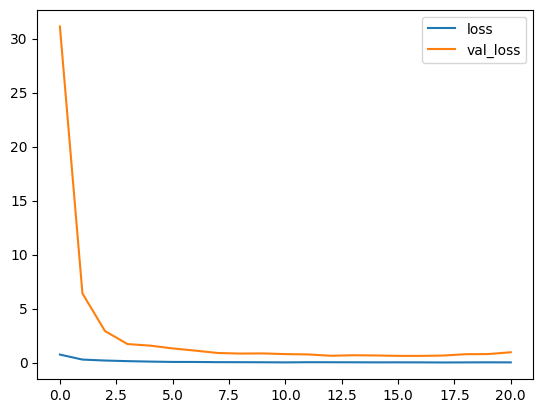

In [ ]:
# 그래프 그리기
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

#### 3) 성능 평가
* 평가는 confusion_matrix, classification_report 활용

In [ ]:
from sklearn.metrics import classification_report

y_test = y_test.argmax(axis=1)
model_pred = model.predict(x_test_array).argmax(axis=1)
print(classification_report(y_test, model_pred))

2/2 [==============================] - 0s 301ms/step
              precision    recall  f1-score   support

           0       0.83      0.74      0.78        34
           1       0.71      0.81      0.76        27

    accuracy                           0.77        61
   macro avg       0.77      0.78      0.77        61
weighted avg       0.78      0.77      0.77        61



### (2) 모델 2
- **세부요구사항**
    - Conv2D, MaxPooling2D, Flatten, Dense 레이어들을 이용하여 모델을 설계
    - 학습시 validation_data로 validation set을 사용하시오.
    - 반드시 Early Stopping 적용
    - 평가시, confusion matrix, accuracy, recall, precision, f1 score 등을 이용하시오.

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from tensorflow.keras.utils import to_categorical

y_val = to_categorical(y_val, 2)
y_test = to_categorical(y_test, 2)

#### 1) 구조 설계

In [ ]:
# 세션 클리어
keras.backend.clear_session()

# 레이어 엮기

## 1. 인풋 레이어
il = keras.layers.Input(shape=(280,280,3))

## 2. Convolution 필터 16, 사이즈(3,3), same padding
hl = keras.layers.Conv2D(filters=16, # 새롭게 제작하려는 feature map의 수
                         kernel_size=(3,3), # Conv2D 필터의 가로세로 사이즈
                         strides=(1,1), # 필터의 이동 보폭
                         padding='same', # feature map 사이즈 유지, 외곽의 정보 반영
                         activation='relu')(il) # 주의!!

## 3. Convolution 필터 16, 사이즈(3,3), same padding
hl = keras.layers.Conv2D(filters=16, # 새롭게 제작하려는 feature map의 수
                         kernel_size=(3,3), # Conv2D 필터의 가로세로 사이즈
                         strides=(1,1), # 필터의 이동 보폭
                         padding='same', # feature map 사이즈 유지, 외곽의 정보 반영
                         activation='relu')(hl) # 주의!!

## 4. BatchNormalization
hl = keras.layers.BatchNormalization()(hl)

## 5. MaxPooling : 사이즈(2,2), 스트라이드(2,2)
hl = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(hl)

## 6. Dropout
h1 = keras.layers.Dropout(0.3)(hl)

## 7. Convolution 필터 32, 사이즈(3,3), same padding
hl = keras.layers.Conv2D(filters=32, # 새롭게 제작하려는 feature map의 수
                         kernel_size=(3,3), # Conv2D 필터의 가로세로 사이즈
                         strides=(1,1), # 필터의 이동 보폭
                         padding='same', # feature map 사이즈 유지, 외곽의 정보 반영
                         activation='relu')(hl) # 주의!!

## 8. Convolution 필터 32, 사이즈(3,3), same padding
hl = keras.layers.Conv2D(filters=32, # 새롭게 제작하려는 feature map의 수
                         kernel_size=(3,3), # Conv2D 필터의 가로세로 사이즈
                         strides=(1,1), # 필터의 이동 보폭
                         padding='same', # feature map 사이즈 유지, 외곽의 정보 반영
                         activation='relu')(hl) # 주의!!

## 9. BatchNormalization
hl = keras.layers.BatchNormalization()(hl)

## 10. MaxPooling : 사이즈(2,2), 스트라이드(2,2)
hl = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(hl)

## 11. Dropout
h1 = keras.layers.Dropout(0.3)(hl)

## 12. Flatten
hl = keras.layers.Flatten()(hl)

## 13. Fully-connected 구성
hl = keras.layers.Dense(64, activation='relu')(hl)

## 14. BatchNormalization
hl = keras.layers.BatchNormalization()(hl)

## 16. 출력층 만들기
ol = Dense(2, activation='softmax')(hl)

# 모델 시작 끝 지정
model_2 = keras.models.Model(il, ol)

# 컴파일
model_2.compile(optimizer='adam',
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 280, 280, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 280, 280, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 280, 280, 16)      2320      
                                                                 
 batch_normalization (Batch  (None, 280, 280, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 140, 140, 16)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 140, 140, 32)      4640  

#### 2) 학습

In [ ]:
y_val = y_val.argmax(axis=1)

In [ ]:
history_2 = model_2.fit(x_train_array, y_train, epochs=10000, verbose=1, validation_data=[x_val_array, y_val], callbacks=[es])

Epoch 1/10000
15/16 [===========================>..] - ETA: 0s - loss: 0.3529 - accuracy: 0.8813

ValueError: ignored

In [ ]:
# 그래프 그리기
import matplotlib.pyplot as plt
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

#### 3) 성능 평가
* 평가는 confusion_matrix, classification_report 활용

In [ ]:
from sklearn.metrics import classification_report

y_test = y_test.argmax(axis=1)
model_pred = model_2.predict(x_test_array).argmax(axis=1)
print(classification_report(y_test, model_pred))

## 4.모델링 II
* **세부요구사항**
    - 성능을 높이기 위해서 다음의 두가지를 시도해 봅시다.
        - Data Augmentation을 통해 데이터를 증가 시킵니다.
        - 사전 학습된 모델(Transfer Learning)을 가져다 사용해 봅시다.

### (1) Data Augmentation
- **세부요구사항**
    * 모델 학습에 이용할 이미지 데이터를 증강시키세요.
    * Keras의 ImageDataGenerator를 이용
        - [ImageDataGenerator document](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

    * ImageDatagenerator를 이용하여 학습
        * 모델 구조는 이미 생성한 1,2,3 중 하나를 선택하여 학습


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Dropout

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

#### 1) ImageDataGenerator 생성
* ImageDataGenerator 함수 사용
    * 주요 옵션
        * rotation_range: 무작위 회전을 적용할 각도 범위
        * zoom_range: 무작위 줌을 적용할 범위 [1-zoom_range, 1+zoom_range]
        * horizontal_flip: 무작위 좌우반전을 적용할지 여부
        * vertical_flip: 무작위 상하반전을 적용할지 여부
        * rescale: 텐서의 모든 값을 rescale 값으로 나누어줌 (이 경우에는 255로 나누어서 0~1사이의 값으로 변경)

In [ ]:
trainIDG = ImageDataGenerator(rescale = 1./255,
                             #zca_whitening=True,
                             rotation_range = 40,
                             zoom_range = 0.5,
                             width_shift_range = 0.5,
                             height_shift_range = 0.5,
                             #shear_range = ,
                             horizontal_flip = True,
                             vertical_flip = True,
                             #fill_mode='nearest'
                            )

valIDG = ImageDataGenerator(rescale=1./255)

#### 2) 데이터 경로에서 이미지 불러 올 준비하기
* .flow_from_directory 이용
    * 디렉토리에서 이미지를 가져와서 데이터 증강을 적용하고 batch 단위로 제공하는 generator를 생성합니다.
    * 이미지를 불러올 때 target_size로 크기를 맞추고,
    * class_mode로 이진 분류(binary)를 수행하도록 지정합니다.


In [ ]:
path = '/content/project/'

In [ ]:
flow_trainIDG = trainIDG.flow_from_directory(
                                directory = path+'Car_Images_train',
                                target_size = (280, 280),
                                batch_size=32,
                                class_mode = 'binary',
                                #shuffle = True
                              )

flow_valIDG = valIDG.flow_from_directory(
                                directory = path+'Car_Images_val',
                                target_size = (280, 280),
                                batch_size=32,
                                class_mode = 'binary',
                                #shuffle = True
                              )

Found 484 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


#### 3) 구조 설계

In [ ]:
clear_session()

model_aug = Sequential()
model_aug.add(Conv2D(filters = 16, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu', input_shape = (280, 280, 3)))
model_aug.add(Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'))
model_aug.add(Dropout(0.4))
model_aug.add(Flatten())
model_aug.add(Dense(1, activation = 'sigmoid'))

model_aug.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_aug.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 280, 280, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 280, 280, 32)      4640      
                                                                 
 dropout (Dropout)           (None, 280, 280, 32)      0         
                                                                 
 flatten (Flatten)           (None, 2508800)           0         
                                                                 
 dense (Dense)               (None, 1)                 2508801   
                                                                 
Total params: 2513889 (9.59 MB)
Trainable params: 2513889 (9.59 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 4) 학습

In [ ]:
history_3 = model_aug.fit(flow_trainIDG, epochs=100, validation_data=[flow_valIDG], verbose=1, callbacks = [es])

Epoch 1/100
16/16 [==============================] - 34s 2s/step - loss: 25.7519 - accuracy: 0.4773 - val_loss: 1.7775 - val_accuracy: 0.6000
Epoch 2/100
16/16 [==============================] - 27s 2s/step - loss: 1.5347 - accuracy: 0.5682 - val_loss: 0.7147 - val_accuracy: 0.7500
Epoch 3/100
16/16 [==============================] - 27s 2s/step - loss: 0.6824 - accuracy: 0.6012 - val_loss: 0.6454 - val_accuracy: 0.6667
Epoch 4/100
16/16 [==============================] - 27s 2s/step - loss: 0.6246 - accuracy: 0.6818 - val_loss: 0.6934 - val_accuracy: 0.8167
Epoch 5/100
16/16 [==============================] - 27s 2s/step - loss: 0.5941 - accuracy: 0.6983 - val_loss: 0.6884 - val_accuracy: 0.8000
Epoch 6/100
16/16 [==============================] - 28s 2s/step - loss: 0.6291 - accuracy: 0.6570 - val_loss: 0.9488 - val_accuracy: 0.6000
Epoch 7/100
16/16 [==============================] - 27s 2s/step - loss: 0.6275 - accuracy: 0.6302 - val_loss: 0.9145 - val_accuracy: 0.7000
Epoch 8/100


#### 5) 성능 평가
* 평가는 confusion_matrix, classification_report 활용

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
x_2_test_array = np.array(x_2_test_array)

In [ ]:
pred_aug = (model_aug.predict(x_2_test_array/255) > 0.5).astype('int32')
print(confusion_matrix(label_test, pred_aug))
print(classification_report(label_test, pred_aug))

2/2 [==============================] - 1s 453ms/step
[[26  8]
 [18  9]]
              precision    recall  f1-score   support

           0       0.59      0.76      0.67        34
           1       0.53      0.33      0.41        27

    accuracy                           0.57        61
   macro avg       0.56      0.55      0.54        61
weighted avg       0.56      0.57      0.55        61



### (2) Transfer Learning
- **세부요구사항**
    * VGG16 모델은 1000개의 클래스를 분류하는 데 사용된 ImageNet 데이터셋을 기반으로 사전 학습된 가중치를 가지고 있습니다.
        * 따라서 이 모델은 이미지 분류 문제에 대한 높은 성능을 보입니다.
        * 이 모델은 보통 전이학습(transfer learning)에서 기본적으로 사용되며, 특히 대규모 데이터셋이 없을 때는 기본 모델로 사용되어 fine-tuning을 수행합니다.
    * VGG16 함수로 부터 base_model 저장


#### 1) VGG16 불러와서 저장하기
* include_top=False로 설정하여 분류기를 제외하고 미리 학습된 가중치 imagenet을 로드합니다.
* .trainable을 False로 설정하여 모델의 모든 레이어들을 Frozen 시켜 가중치를 고정합니다.


In [ ]:
base_model = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
)

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

#### 2) VGG16과 연결한 구조 설계
* VGG16을 불러와서 Flatten, Dense 등으로 레이어 연결하기

In [ ]:
clear_session()

input = Input(shape=(280, 280, 3))
x = base_model(input)
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu')(x)
#x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.4)(x)
#x =  tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Flatten()(x)
output = Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(input, output)
model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 280, 280, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 conv2d (Conv2D)             (None, 8, 8, 32)          147488    
                                                                 
 dropout (Dropout)           (None, 8, 8, 32)          0         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 14864225 (56.70 MB)
Trainable params: 149537 (5

#### 3) 학습
- **세부요구사항**
    - 모델 학습 과정에 알맞은 보조 지표를 사용하세요.
    - 데이터
        - Data Augmentation에서 생성한 ImageDataGenerator를 학습에 이용하세요.
        - Early Stopping을 반드시 사용하세요.
        - 최적의 가중치를 모델에 적용하세요.

In [ ]:
history3 = model.fit(flow_trainIDG, epochs = 10, validation_data = [flow_valIDG], callbacks = [es], verbose = 1)

Epoch 1/10
16/16 [==============================] - 42s 2s/step - loss: 0.7389 - accuracy: 0.5599 - val_loss: 0.5741 - val_accuracy: 0.6667
Epoch 2/10
16/16 [==============================] - 28s 2s/step - loss: 0.6433 - accuracy: 0.5868 - val_loss: 0.5535 - val_accuracy: 0.7500
Epoch 3/10
16/16 [==============================] - 27s 2s/step - loss: 0.5759 - accuracy: 0.7211 - val_loss: 0.3506 - val_accuracy: 0.9000
Epoch 4/10
16/16 [==============================] - 28s 2s/step - loss: 0.5581 - accuracy: 0.7066 - val_loss: 0.3642 - val_accuracy: 0.9167
Epoch 5/10
16/16 [==============================] - 27s 2s/step - loss: 0.5289 - accuracy: 0.7603 - val_loss: 0.2679 - val_accuracy: 0.9000
Epoch 6/10
16/16 [==============================] - 28s 2s/step - loss: 0.5158 - accuracy: 0.7665 - val_loss: 0.3207 - val_accuracy: 0.8833
Epoch 7/10
16/16 [==============================] - 28s 2s/step - loss: 0.4621 - accuracy: 0.7789 - val_loss: 0.2531 - val_accuracy: 0.8833
Epoch 8/10
16/16 [==

#### 4) 성능 평가

In [ ]:
pred_vgg = (model.predict(x_2_test_array/255) < 0.5).astype('int32')
print(confusion_matrix(label_test, pred_vgg))
print(classification_report(label_test, pred_vgg))

2/2 [==============================] - 6s 6s/step
[[20 14]
 [12 15]]
              precision    recall  f1-score   support

           0       0.62      0.59      0.61        34
           1       0.52      0.56      0.54        27

    accuracy                           0.57        61
   macro avg       0.57      0.57      0.57        61
weighted avg       0.58      0.57      0.57        61

